# 使用ライブラリのインポート

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import seaborn as sns

　 ## データの読み込み(from googleplaystore.csv)

In [97]:
data_store = pd.read_csv("googleplaystore.csv", header=0)
data_customer = pd.read_csv("googleplaystore_user_reviews.csv")
#Data version 5 from kaggle

### 欠損値検査

In [98]:
def lack_table(df): 
    import pandas
    '''
    This function is caliculation of lack values from raw data.
    
    Library: pandas, numpy
    
    params
    ---------
    df : DataFrame
            raw data set.
    
    Returns
    --------
    lack_table_ren_columns: pandas.DataFrame
                            Return results lack of raw data.
    '''
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    lack_table = pandas.concat([null_val, percent], axis=1)
    lack_table_ren_columns = lack_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return lack_table_ren_columns



In [99]:
lack_table(data_store)

,欠損数,%
App,0,0.000000
Category,0,0.000000
Rating,1474,13.596532
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.009224
Price,0,0.000000
Content Rating,1,0.009224
Genres,0,0.000000


In [100]:
lack_table(data_customer)

,欠損数,%
App,0,0.000000
Translated_Review,26868,41.788631
Sentiment,26863,41.780854
Sentiment_Polarity,26863,41.780854
Sentiment_Subjectivity,26863,41.780854


#### 欠損値処理

##### Data store

In [101]:
data_store["Rating"] = data_store["Rating"].fillna(data_store["Rating"].median())
data_store["Type"] = data_store["Type"].fillna("Free")
data_store["Content Rating"] = data_store["Content Rating"].fillna("Everyone")
data_store["Current Ver"] = data_store["Current Ver"].fillna("unknown")
data_store["Android Ver"].loc[4453] = "Only custom farm ware 8.1or 9.0 "
data_store["Android Ver"].loc[4490] = "4.0.3 and up"
data_store["Android Ver"].loc[10472] = "4.0 and up"
data_store["Rating"].loc[10472] = 4.7
data_store["Category"].loc[10472] = "TOOLS"
data_store["Reviews"].loc[10472] = "19"
data_store["Size"].loc[10472] = "3.0M"
data_store["Installs"].loc[10472] = "1,000+"
data_store["Type"].loc[10472] = "Free"
data_store["Price"].loc[10472] = 0
data_store["Content Rating"].loc[10472] = "Everyone"
data_store["Genres"].loc[10472] = "Everyone"
data_store["Last Updated"].loc[10472] = "February 11, 2018"
data_store["Current Ver"].loc[10472] = "1.0.19"

/Users/kozuzu931/.pyenv/versions/anaconda3-4.3.1/envs/ds2019/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Data customer

In [102]:
data_customer["Translated_Review"] = data_customer["Translated_Review"].fillna("No comments")
data_customer["Sentiment"] = data_customer["Sentiment"].fillna("No comments")
data_customer["Sentiment_Polarity"] = data_customer["Sentiment_Polarity"].fillna("No comments")
data_customer["Sentiment_Subjectivity"] = data_customer["Sentiment_Subjectivity"].fillna("No comments")

### 欠損値処理確認

In [103]:
lack_table(data_store)

,欠損数,%
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


In [104]:
lack_table(data_customer)

,欠損数,%
App,0,0.0
Translated_Review,0,0.0
Sentiment,0,0.0
Sentiment_Polarity,0,0.0
Sentiment_Subjectivity,0,0.0


スタージェスの公式関数

In [105]:
def sturges(line_length):
    '''
    This function is caliculation of suitable bin value with formula of Sturges.
    
    parames
    ----------
    line_length: int
    
    Returns
    ---------
    suitable_bins: int
    '''
    suitable_bins = int((1 + np.log2(line_length)))
    return suitable_bins

# Store data analysis

In [106]:
data_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [107]:
app_names_list = data_store["App"].unique()
print("google play storeアプリタイトル数: {} apps".format(len(app_names_list)))

google play storeアプリタイトル数: 9660 apps


## カテゴリー

In [108]:
category_names_list = data_store["Category"].unique()
print("google play storeカテゴリー数: {}".format(category_names_list))

google play storeカテゴリー数: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [109]:
category_data = data_store.groupby("Category").count()
category_values = np.sort(category_data["App"].values)
sorted_category_name = category_data.App.sort_values().index.values
category_name_position = np.arange(0, len(sorted_category_name))
width = 0.5

In [110]:
category_values

array([  53,   60,   60,   64,   65,   82,   85,   85,   88,  127,  137,
        149,  156,  175,  231,  234,  258,  260,  283,  295,  335,  341,
        366,  382,  384,  387,  392,  424,  460,  463,  844, 1144, 1972])

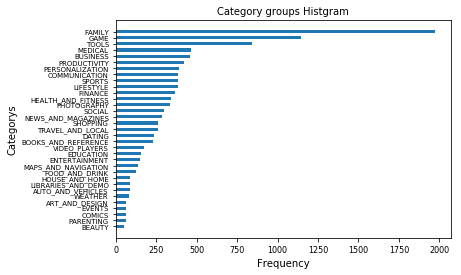

In [111]:
plt.barh(category_name_position + width, category_values, width, tick_label=sorted_category_name)
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.xlabel("Frequency", fontsize=10)
plt.ylabel("Categorys", fontsize=10)
plt.title("Category groups Histgram", fontsize=10)
plt.show()

In [112]:
Category_sets = pd.DataFrame(category_values[::-1], index=sorted_category_name[::-1])
Category_sets

,0
FAMILY,1972
GAME,1144
TOOLS,844
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


## レーティング(評価)

In [113]:
Rating_stastitics = pd.DataFrame(pd.Series(data_store["Rating"].ravel()).describe()).transpose()
Rating_stastitics

,count,mean,std,min,25%,50%,75%,max
0,10841.0,4.206522,0.480343,1.0,4.1,4.3,4.5,5.0


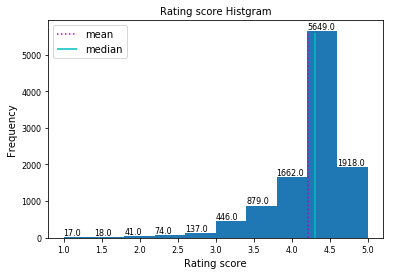

In [114]:
Rating_score_hist = plt.hist(data_store["Rating"])
plt.vlines(x=[data_store["Rating"].mean()], ymin=0.0, ymax=5600.0, colors="m", linestyle=":", label="mean")
plt.vlines(x=[data_store["Rating"].median()], ymin=0.0, ymax=5600.0, colors="c", linestyle="-", label="median")
for x, y in zip(Rating_score_hist[1], Rating_score_hist[0]):
    plt.text(x, y, y, ha="left", va="bottom", fontsize=8)
plt.xlabel("Rating score", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Rating score Histgram", fontsize=10)
plt.legend(fontsize=10)
plt.show()

## レビュー数

In [115]:
pd.DataFrame(data_store.sort_values("Reviews", ascending=False))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,"June 27, 2018",2.4,4.1 and up
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5.5M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"March 31, 2017",1.23,2.1 and up
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10M,"50,000+",Free,0,Everyone,Tools,"September 28, 2017",2.3,4.0.3 and up


In [116]:
Reviews_line = data_store.loc[:, "Reviews"]
Reviews_line = pd.Series([int(i) for i in Reviews_line])

In [117]:
Reviews_stastitics = pd.DataFrame(pd.Series(Reviews_line.ravel()).describe()).transpose()
Reviews_stastitics

,count,mean,std,min,25%,50%,75%,max
0,10841.0,444111.928051,2.927629e+06,0.0,38.0,2094.0,54768.0,78158306.0


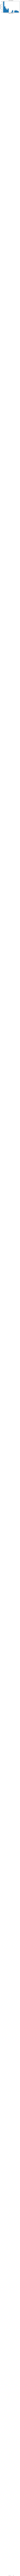

In [118]:
Review_hist = plt.hist(Reviews_line, bins=sturges(len(Reviews_line)), align="mid", log=True)
for x, y in zip(Review_hist[1], Review_hist[0]):
    plt.text(x, y, y, ha="left", va="bottom", fontsize=8)
Reviews_xtick_label = ["{:.3g}".format(i) for i in np.round(Review_hist[1], -6)]
plt.xticks(Review_hist[1], Reviews_xtick_label, fontsize=6)
plt.xlabel("Number of Review", fontsize=10)
plt.ylabel("Frequency [log10]", fontsize=10)
plt.title("Reviews Histgram", fontsize=10)
plt.show()

In [119]:
pd.DataFrame(np.round(Review_hist[1], -6)).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,6000000.0,11000000.0,17000000.0,22000000.0,28000000.0,33000000.0,39000000.0,45000000.0,50000000.0,56000000.0,61000000.0,67000000.0,73000000.0,78000000.0


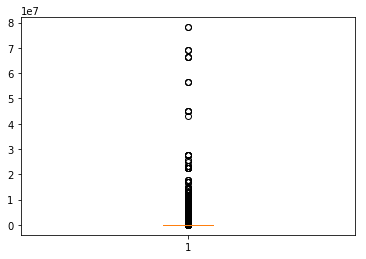

In [120]:
Review_boxplot = plt.boxplot(Reviews_line)

## サイズ[MB]

In [121]:
size_line_m = data_store[data_store["Size"].str.endswith('M')].Size
size_line_k = data_store[data_store["Size"].str.endswith('k')].Size
size_line_m = [i.strip('M') for i in size_line_m]
size_line_k = [j.strip('k') for j in size_line_k]

In [122]:
size_line = []
size_line.extend([float(i)*1024 for i in size_line_m])
size_line.extend([float(j) for j in size_line_k])
size_line = pd.Series(size_line)

In [123]:
pd.DataFrame(pd.Series((size_line/1024).ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,9146.0,21.514141,22.588679,0.008301,4.9,13.0,30.0,100.0


Text(0.5, 1.0, 'App size Histgram')

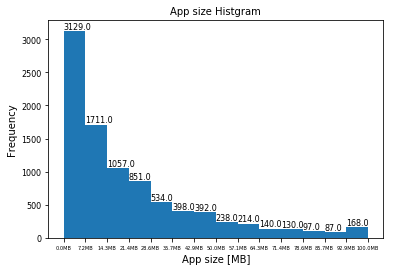

In [124]:
Size_hist = plt.hist(size_line, bins=sturges(len(size_line)))
for x, y in zip(Size_hist[1], Size_hist[0]):
    plt.text(x, y, y, ha="left", va="bottom", fontsize=8)
plt.xticks(Size_hist[1], ["{:.1f}MB".format(i) for i in Size_hist[1]/1024], fontsize=5)
plt.yticks(fontsize=8)
plt.xlabel("App size [MB]", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("App size Histgram", fontsize=10)

In [125]:
pd.DataFrame(["{:.2f}MB".format(i) for i in Size_hist[1]/1024]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.01MB,7.15MB,14.29MB,21.44MB,28.58MB,35.72MB,42.86MB,50.00MB,57.15MB,64.29MB,71.43MB,78.57MB,85.72MB,92.86MB,100.00MB


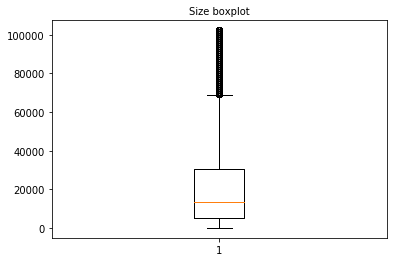

In [126]:
plt.boxplot(size_line)
plt.title("Size boxplot", fontsize=10)
plt.show()

## Install数

In [127]:
Install_volume = data_store.groupby("Installs").count()
pd.DataFrame(Install_volume.App)
#.sort_index(level=["0+","1+","5+","10+","50+","100+","500+","1,000+","5,000+","10,000+","50,000+","100,000+","500,000+","1,000,000+","5,000,000+","10,000,000+","50,000,000+","100,000,000+","500,000,000+"])

,App
Installs,
0,1
0+,14
1+,67
"1,000+",908
"1,000,000+",1579
"1,000,000,000+",58
10+,386
"10,000+",1054
"10,000,000+",1252


In [128]:
sorted_Install_volume = ["0+","1+","5+","10+","50+","100+","500+","1,000+","5,000+","10,000+","50,000+","100,000+","500,000+","1,000,000+","5,000,000+","10,000,000+","50,000,000+","100,000,000+","500,000,000+"]
Install_values = [Install_volume["App"][i] for i in sorted_Install_volume]
Install_volume_position = np.arange(0, len(sorted_Install_volume))


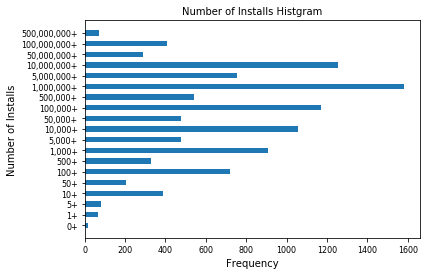

In [129]:
plt.barh(Install_volume_position, Install_values, width, tick_label=sorted_Install_volume)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Frequency", fontsize=10)
plt.ylabel("Number of Installs", fontsize=10)
plt.title("Number of Installs Histgram", fontsize=10)
plt.show()

## アプリTypeと価格帯

### アプリType

In [130]:
Type_free = data_store[data_store["Type"] == "Free"].Type.count()

In [131]:
Type_paid = data_store[data_store["Type"] != "Free"].Type.count()

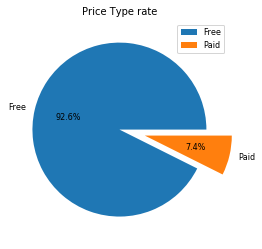

In [132]:
plt.pie([Type_free,Type_paid], labels=["Free", "Paid"], explode=[0, 0.3], autopct="%1.1f%%", textprops={"fontsize":8})
plt.legend(fontsize=8)
plt.title("Price Type rate", fontsize=10)
plt.show()

###  アプリ価格帯

In [133]:
Price = data_store[data_store["Type"] != "Free"].Price.str.replace("$", "").astype(float)

In [134]:
pd.DataFrame(pd.Series(Price.ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,800.0,13.920838,57.195358,0.99,1.49,2.99,4.99,400.0


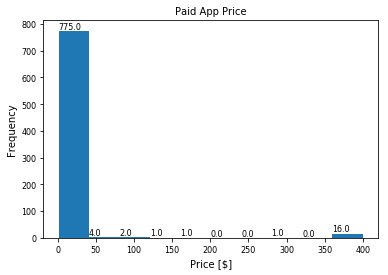

In [135]:
Price_hist = plt.hist(Price, bins=sturges(len(Price)))
for x, y in zip(Price_hist[1], Price_hist[0]):
    plt.text(x, y, y, ha="left", va="bottom", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Price [$]", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Paid App Price", fontsize=10)
plt.show()

In [136]:
a = ["${:.0f}".format(round(i)) for i in Price_hist[1]]
a.insert(0,"$0")
a

['$0',
 '$1',
 '$41',
 '$81',
 '$121',
 '$161',
 '$200',
 '$240',
 '$280',
 '$320',
 '$360',
 '$400']

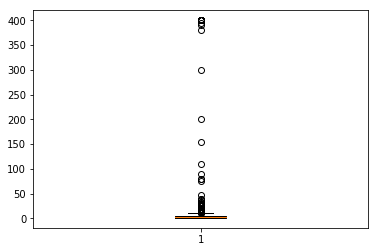

In [137]:
plt.boxplot(Price)
plt.show()

## コンテンツレーティング(年齢制限)

In [138]:
Content_Rating = data_store["Content Rating"].unique()
Content_Rating_frequence = pd.DataFrame(data_store.groupby("Content Rating").count().App)
Content_values = Content_Rating_frequence.values.reshape(-1)
Content_position = range(0, len(Content_Rating))

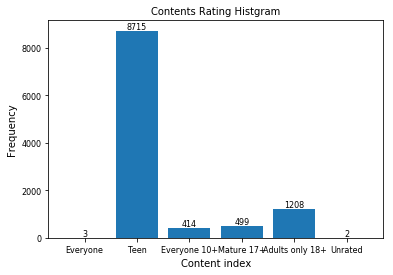

In [139]:
plt.bar(Content_position, Content_values)
for x, y in zip(Content_position, Content_values):
    plt.text(x, y, y, ha="center", va="bottom", fontsize=8)
plt.xticks(np.arange(0, 6), Content_Rating, fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Content index", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Contents Rating Histgram", fontsize=10)
plt.show()

## 人気アプリ傾向
install数10,000+~

In [140]:
Famoust_install = np.asarray([sorted_Install_volume])[:, 9:].reshape(-1)
Famoust_App = data_store[data_store["Installs"].isin(Famoust_install)]
Famoust_App

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### 人気カテゴリ

In [141]:
Famoust_category = Famoust_App.groupby("Category").App.count().sort_values()
Famoust_category

Category
EVENTS                   27
BEAUTY                   42
COMICS                   52
ART_AND_DESIGN           55
PARENTING                55
AUTO_AND_VEHICLES        57
LIBRARIES_AND_DEMO       60
WEATHER                  72
HOUSE_AND_HOME           77
MAPS_AND_NAVIGATION      98
FOOD_AND_DRINK          106
BOOKS_AND_REFERENCE     134
VIDEO_PLAYERS           134
ENTERTAINMENT           148
DATING                  153
EDUCATION               154
NEWS_AND_MAGAZINES      186
TRAVEL_AND_LOCAL        190
MEDICAL                 192
BUSINESS                204
SOCIAL                  211
SHOPPING                217
LIFESTYLE               220
PERSONALIZATION         232
FINANCE                 253
HEALTH_AND_FITNESS      255
COMMUNICATION           256
PRODUCTIVITY            278
PHOTOGRAPHY             279
SPORTS                  279
TOOLS                   562
GAME                   1009
FAMILY                 1347
Name: App, dtype: int64

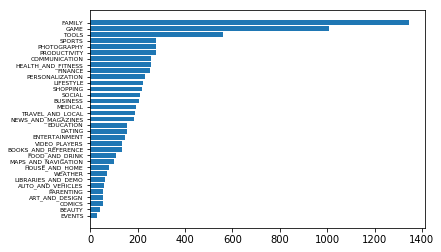

In [142]:
Famoust_category_barh = plt.barh(np.arange(0,len(Famoust_category.index.values)) + 0.5, Famoust_category.values, tick_label=Famoust_category.index)
plt.yticks(fontsize=6)
plt.show()